# Introduction

In this notebook, I selected the dataset from Kaggle about the **Esport industry**, mainly about its earning. The reasons to select it are:
1. It is a small size of data, that could be easy to handle for a new analyst
2. It can be done in a reasonable time
3. I feel interested and curious about the data set although it is not my domain

After reading the notebook, the reader should have an overview and some interesting facts about the ESport industry. Further analysis could be done with more time and discussion.

The link below is where the dataset can be found:

[Kaggle: Esport dataset](https://www.kaggle.com/rushikeshhiray/esport-earnings?select=ESport_Earnings.csv)

# Importing libraries

In [1]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# plotly standard imports
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py

# cufflinks
import cufflinks as cf

# for data loading
import numpy as np
import pandas as pd
pd.options.display.max_columns=30

# Display all the cell ouput
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# since we are working with the cufflinks 
# set plotly+cufflinks in offline mode
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
# SETTING THE THEME IN CUFFLINKS
cf.set_config_file(theme='pearl')

# Import the data

In [2]:
df=pd.read_csv('ESport_Earnings.csv')
df

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011
...,...,...,...,...,...,...,...,...,...
499,165,4957837.61,World of WarCraft,Role-Playing Game,413,118,United States,1416887.48,2004
500,623,50000.00,WWE 2K20,Fighting Game,20,2,United States,43500.00,2019
501,376,5489.65,Xonotic,First-Person Shooter,133,25,Netherlands,1881.44,2010
502,520,48746.72,Yu-Gi-Oh! Duel Links,Collectible Card Game,328,219,United States,19983.28,2016


# Tidying

- The data seem quite clean, no missing, duplicate value.
- No variable is setted as column
- However, i try to make its columns into correct types for later analysis, especially the Releaseyear

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IdNo                  504 non-null    int64  
 1   TotalMoney            504 non-null    float64
 2   GameName              504 non-null    object 
 3   Genre                 504 non-null    object 
 4   PlayerNo              504 non-null    int64  
 5   TournamentNo          504 non-null    int64  
 6   Top_Country           504 non-null    object 
 7   Top_Country_Earnings  504 non-null    float64
 8   Releaseyear           504 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.6+ KB


In [4]:
df.duplicated().sum()

0

## Fixing the Releaseyear format

In [6]:
df['Releaseyear']=pd.to_datetime(df.Releaseyear, format='%Y')

ValueError: time data '11' does not match format '%Y' (match)

In [7]:
df.Releaseyear.value_counts()

2019    38
2017    38
2018    37
2016    37
2015    36
2013    27
2007    27
2014    23
2020    21
2004    20
2012    20
2005    20
2008    19
2011    18
2010    18
2003    13
1999    12
2009    12
2002    12
2006    12
2001     9
2000     7
1998     7
1997     4
1996     4
1995     4
1994     4
1993     2
1981     1
1989     1
11       1
Name: Releaseyear, dtype: int64

In [8]:
df.query('Releaseyear==11')

,IdNo,TotalMoney,GameName,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
162,378,132.37,Forza Motorsport 4,Racing,2,1,Finland,132.37,11


In [9]:
df.drop(162,inplace=True)

In [10]:
df['Releaseyear']=pd.to_datetime(df.Releaseyear, format='%Y')

In [11]:
df.dtypes

IdNo                             int64
TotalMoney                     float64
GameName                        object
Genre                           object
PlayerNo                         int64
TournamentNo                     int64
Top_Country                     object
Top_Country_Earnings           float64
Releaseyear             datetime64[ns]
dtype: object

## Remove unnecessary column

Since the 'IdNo' column didnt give us any inside, it could be remove for a better dataset

In [12]:
df.drop('IdNo',axis=1,inplace=True)

## Rearrange the variable and index

In [13]:
df = df[['Releaseyear', 
         'Genre', 
         'GameName', 
         'PlayerNo', 
         'TournamentNo',
         'TotalMoney',
         'Top_Country',
         'Top_Country_Earnings']]
df

,Releaseyear,Genre,GameName,PlayerNo,TournamentNo,TotalMoney,Top_Country,Top_Country_Earnings
0,2018-01-01,Fighting Game,Acceleration of SUGURI 2,6,2,310.00,United States,310.00
1,1997-01-01,Strategy,Age of Empires,246,95,190075.61,Viet Nam,123408.43
2,1999-01-01,Strategy,Age of Empires II,956,576,1492489.51,China,174252.44
3,2005-01-01,Strategy,Age of Empires III,106,76,68113.85,United States,18523.52
4,2011-01-01,Strategy,Age of Empires Online,16,7,2668.00,Germany,1264.00
...,...,...,...,...,...,...,...,...
499,2004-01-01,Role-Playing Game,World of WarCraft,413,118,4957837.61,United States,1416887.48
500,2019-01-01,Fighting Game,WWE 2K20,20,2,50000.00,United States,43500.00
501,2010-01-01,First-Person Shooter,Xonotic,133,25,5489.65,Netherlands,1881.44
502,2016-01-01,Collectible Card Game,Yu-Gi-Oh! Duel Links,328,219,48746.72,United States,19983.28


In [14]:
df.Releaseyear.nunique()

30

In [15]:
df.Top_Country.nunique()

33

In [16]:
df.groupby(['Top_Country','Genre']).count()

Releaseyear  GameName  PlayerNo  \
Top_Country   Genre                                                   
Australia     Fighting Game                   1         1         1   
Azerbaijan    Strategy                        2         2         2   
Brazil        Fighting Game                   1         1         1   
              Puzzle Game                     1         1         1   
              Racing                          2         2         2   
...                                         ...       ...       ...   
United States Role-Playing Game               3         3         3   
              Sports                         15        15        15   
              Strategy                       13        13        13   
              Third-Person Shooter            6         6         6   
Viet Nam      Strategy                        1         1         1   

                                    TournamentNo  TotalMoney  \
Top_Country   Genre                                            
Australia     Fighting Game                    1           1   
Azerbaijan    Strategy                         2           2   
Brazil        Fighting Game                    1           1   
              Puzzle Game                      1           1   
              Racing                           2           2   
...                                          ...         ...   
United States Role-Playing Game                3           3   
              Sports                          15          15   
              Strategy                        13          13   
              Third-Person Shooter             6           6   
Viet Nam      Strategy                         1           1   

                                    Top_Country_Earnings  
Top_Country   Genre                                       
Australia     Fighting Game                            1  
Azerbaijan    Strategy                                 2  
Brazil        Fighting Game                            1  
              Puzzle Game                              1  
              Racing                                   2  
...                                                  ...  
United States Role-Playing Game                        3  
              Sports                                  15  
              Strategy                                13  
              Third-Person Shooter                     6  
Viet Nam      Strategy                                 1  

[110 rows x 6 columns]

In [17]:
df.set_index('Releaseyear',inplace=True)

In [18]:
df.sort_index(inplace=True)
df.head()

,Genre,GameName,PlayerNo,TournamentNo,TotalMoney,Top_Country,Top_Country_Earnings
Releaseyear,,,,,,,
1981-01-01,Puzzle Game,Pac-man,0,0,0.00,None,0.00
1989-01-01,Puzzle Game,Tetris,27,7,16026.38,United States,13065.13
1993-01-01,Sports,NHL '94,25,8,3818.56,Canada,2633.34
1993-01-01,Fighting Game,Teenage Mutant Ninja Turtles: Tournament Fighters,7,2,820.00,United States,820.00
1994-01-01,Fighting Game,Fighter's History Dynamite,3,1,195.00,Japan,195.00


# EDA

## Overview of ESport 

### ESport industry through decades
- Overall, the line chart show that **Esport industry grow significant** through the decades.

- The correlation chart show how the relationship between Number of Player, Tournament and total value. It seem that they both have a **positive relation**.

- There was a massive increasing in number of Player and Tournament from 1990s to 2000s. However, the Value of its industry actually flying off in 2010s.

- The number of Tournament is decreasing since 2000s, it is an opposite trend in compare with Number of Player and the economy of the industry. It is also shown a weak positive correlation between number of Tournament and Value of total industry.

---

In short, the ESport industry is expanding quickly both in player and it size but the number of tournament is decreasing. It could be a hypothesis that **the prize for tournament is increasing and the industry is focusing more on a quality ones**. 

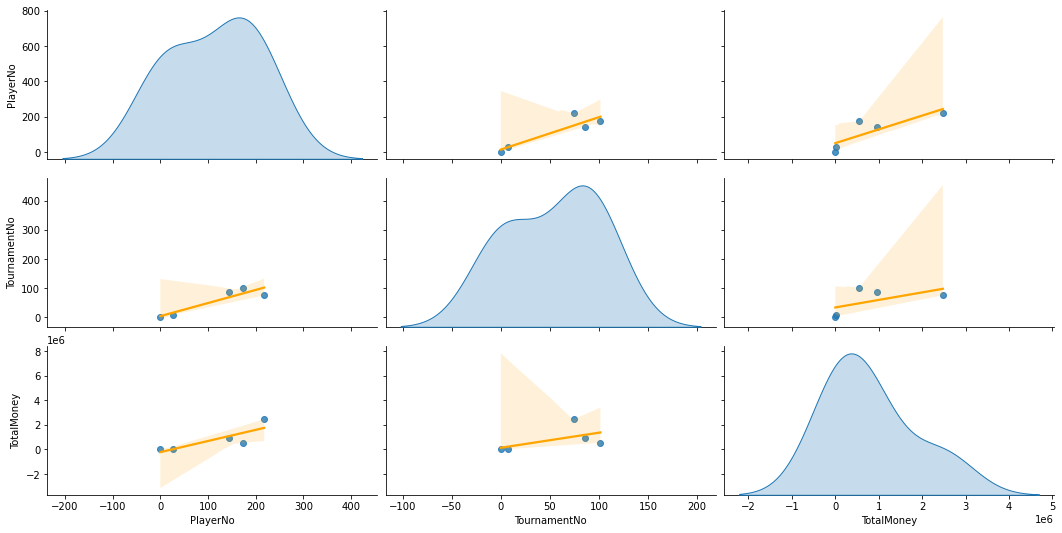

In [19]:
# ESport through decade
Decades = df.resample('10Y')['PlayerNo', 'TournamentNo', 'TotalMoney'].mean()
Decades.iplot(kind='line',
              mode='lines+markers',
              colorscale='pastel2',
              showgrid=False,
              subplots=True,
              shape=(1, 3),
              title='ESPORT THROUGH DECADES',
              subplot_titles=True)

sns.pairplot(Decades, aspect=2,
             diag_kind='kde', kind="reg", plot_kws={'line_kws': {'color': 'orange'}})

### No of Game by Genre

- Fighting Game, First-Person Shooter, Sport, Strategy and Racing are the top 5 with no of Game in ESport respectively.

In [20]:
# No of Game in each Genre
c = df.groupby('Genre')['GameName'].count()
c.iplot(kind='bar',
        colorscale='henanigans',
        showgrid=False,
        title="No OF GAME BY GENRE",
        yTitle="No of GAME",
        vline=dict(x=c.index[2], color="orange"))

### Top 10 earning countries
- Three countries: United States, Korea and China are maintaining a highest earning in Esport.
- The fourth earning country is Denmark but it is still byfar to the third position China.

In [21]:
# Top 10 earning countries
d = df.groupby('Top_Country')['Top_Country_Earnings'].sum().nlargest(10)
d.iplot(kind='bar',
        colorscale='pastel2',
        showgrid=False,
        title="TOP 10 EARNING COUNTRIES IN ESPORT",
        yTitle="Earning $",
        mode="lines+markers",
        vspan=dict(x0=d.index[0], x1=d.index[2]))

### Top 10 Games with highest value in $
- Dota 2 is the game with highest value in ESport. Its value even more than double the value of the second position Counter-Strike: GO

In [22]:
# Top 10 Games with high money
e = df.groupby('GameName')['TotalMoney'].sum().nlargest(10)
e.iplot(kind='bar',
        colorscale='pastel1',
        showgrid=False,
        title="TOP 10 GAMES WITH HIGHEST VALUE",
        yTitle="TOTAL MONEY $",
        vline=dict(x=e.index[0], color="blue"))

### Top 10 Games with high number of players
- Counter-Strike:GO is the ESport game with highest number of player.
- Although it has the highest value in ESport, Dota 2 only rank no 5 in number of players 

In [23]:
# Top 10 Games with players
f = df.groupby('GameName')['PlayerNo'].sum().nlargest(10)
f.iplot(kind='bar',
        colorscale='pastel2',
        showgrid=False,
        title="TOP 10 GAMES WITH HIGH PLAYER",
        yTitle="No of PLAYER",
        vline=dict(x=f.index[0], color="orange"))

### Top 10 Games with high number of Tournament
- Suprisingly, StarCraft II rank no 1 with highest number of Tournament although it only rank No9 in number of player
- Following closely StarCraft is Counter-Strike:GO at 2nd place.
- Again, the top value game Dota2 is only at No5 in term of Tournament

In [24]:
# Top 10 Games with Tournament
g = df.groupby('GameName')['TournamentNo'].sum().nlargest(10)
g.iplot(kind='bar',
        colorscale='pastel1',
        showgrid=False,
        title="TOP 10 GAMES WITH HIGH NUMBER OF TOURNAMENT",
        yTitle="No of TOURNAMENT",
        vline=dict(x=g.index[0], color="blue"))

## Group Analysis

With the overview about the Esport given above, we see that it start to reveal some interesting facts which we can divide the data into different set for a better analysis.

### Game categories

In [25]:
# Create game categories by Genre (sum method)
Game_cat = df.groupby('Genre').sum()

# Adding the No of Game to each categories (count method)
Game_cat['GameNo'] = df.groupby('Genre')['GameName'].count()

# Remove the Top country earnings since it is not important for out subdata
Game_cat = Game_cat.drop('Top_Country_Earnings', axis=1)
Game_cat

,PlayerNo,TournamentNo,TotalMoney,GameNo
Genre,,,,
Battle Royale,9947,1203,1.329225e+08,11
Collectible Card Game,4043,1531,3.427140e+07,13
Fighting Game,12530,8928,2.017032e+07,160
First-Person Shooter,36565,11254,2.283336e+08,106
Multiplayer Online Battle Arena,15475,5137,3.542992e+08,22
Puzzle Game,125,52,3.908297e+04,14
Racing,2463,896,7.753197e+06,49
Role-Playing Game,699,201,5.968597e+06,5
Sports,3407,2169,2.618262e+07,66


---

Since the data mainly about Esport earnings, or its size, so we will focus on it mainly:
1. In the scatter charts:
- The totalMoney/Earning gives a good positive relationship with Number of Player. More money, more number of player increase
- The totalMoney/Earning gives positive correlation with all number of Player, Tournament except the Number of Game
2. In the bar chart:
- As the result of the relationship between TotalMoney and Number of Game in each Genre is very low (almost flat), there are many games in a genre such as Fighting type but give a little value in the total earning and the opposite for Multiplayer Online Battle Arena.

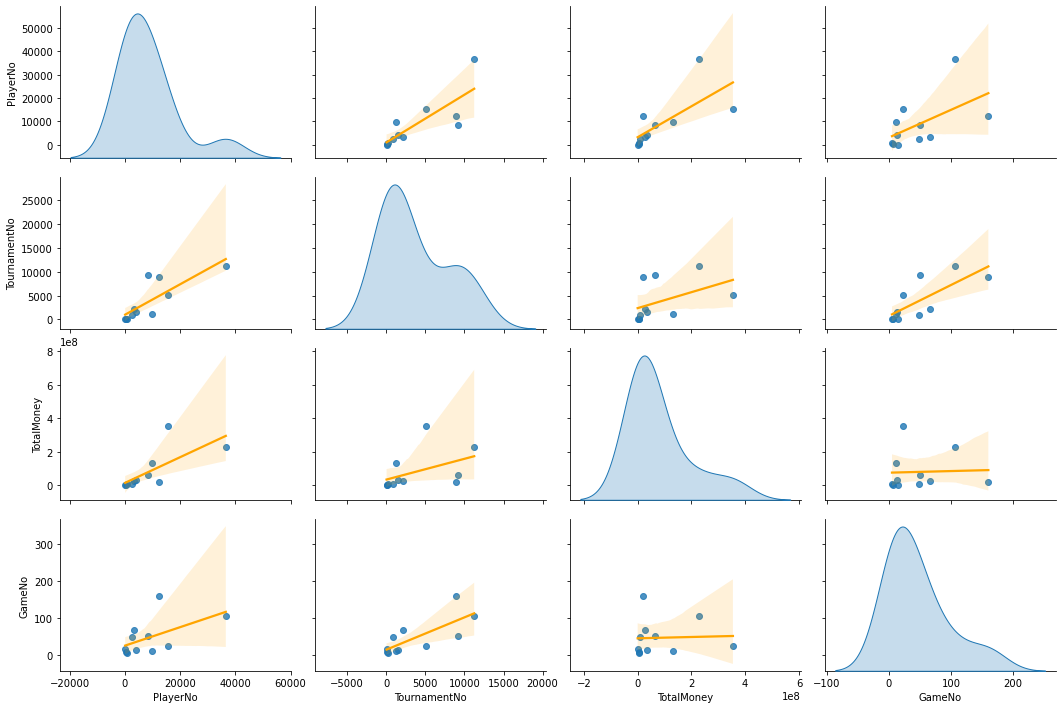

In [26]:
Game_cat.iplot(kind='bar',
               subplots=True,
               vertical_spacing=0.5,
               subplot_titles=True,
               showgrid=False,
               colorscale='pastel2',
               title='GAME CATEGORIES')
               #shared_xaxes=True)

sns.pairplot(Game_cat, aspect=1.5,
             diag_kind='kde', kind="reg", plot_kws={'line_kws': {'color': 'orange'}})

---

### Top 10 Game titles
In this category, we select the top 10 Games with highest earnings to check if there is any insight

In [27]:
# Create game title data set (sum method)
Gamename = df.groupby('GameName').sum()

# Drop the Top_Country_Earnings since it is not important
Gamename.drop('Top_Country_Earnings', axis=1, inplace=True)

# Sort the top 10 game by Total Money -> No of Tournament -> Player No
Top10Games=Gamename.sort_values(by=['TotalMoney', 'TournamentNo', 'PlayerNo'], ascending=False).head(10)
Top10Games

,PlayerNo,TournamentNo,TotalMoney
GameName,,,
Dota 2,3836,1434,2.274199e+08
Counter-Strike: Global Offensive,13032,5252,1.024743e+08
Fortnite,4347,660,9.750842e+07
League of Legends,7130,2477,7.900345e+07
StarCraft II,2078,5909,3.391406e+07
Overwatch,3494,743,2.604933e+07
PLAYERUNKNOWN'S BATTLEGROUNDS,2754,294,2.371038e+07
Hearthstone,2423,898,2.309838e+07
Heroes of the Storm,1250,463,1.817798e+07


As we can see in the scatter chart, there are positive correlation between three variable: PlayerNo, TournamentNo and TotalMoney in the top 10 earnings game. However:
- The correlation between Total Money and two others is rather weak
- The correlation between PlayerNo and TournamentNo is much clearer

In short, Earnings of a game in ESport doesnt depend much on Number of its player or tournament.

<Figure size 1080x576 with 0 Axes>

<AxesSubplot:xlabel='PlayerNo', ylabel='TournamentNo'>

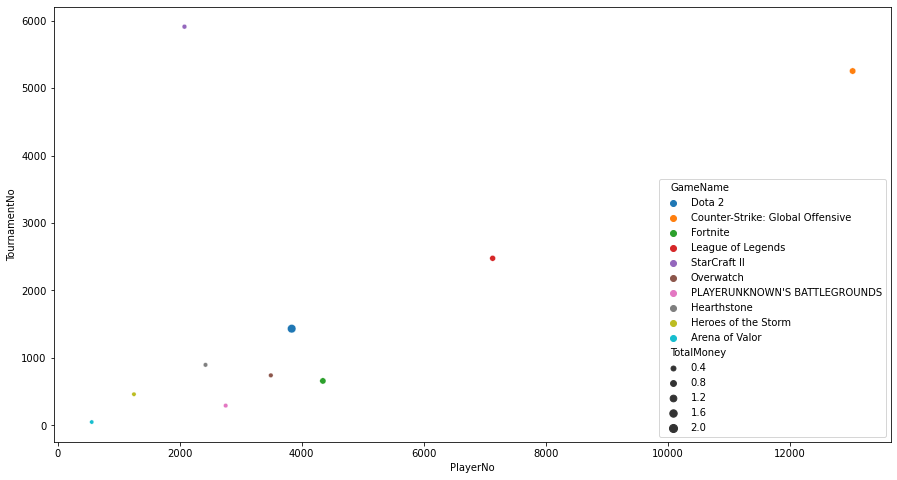

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=Top10Games,x="PlayerNo",y="TournamentNo",hue="GameName",size='TotalMoney',legend='auto')

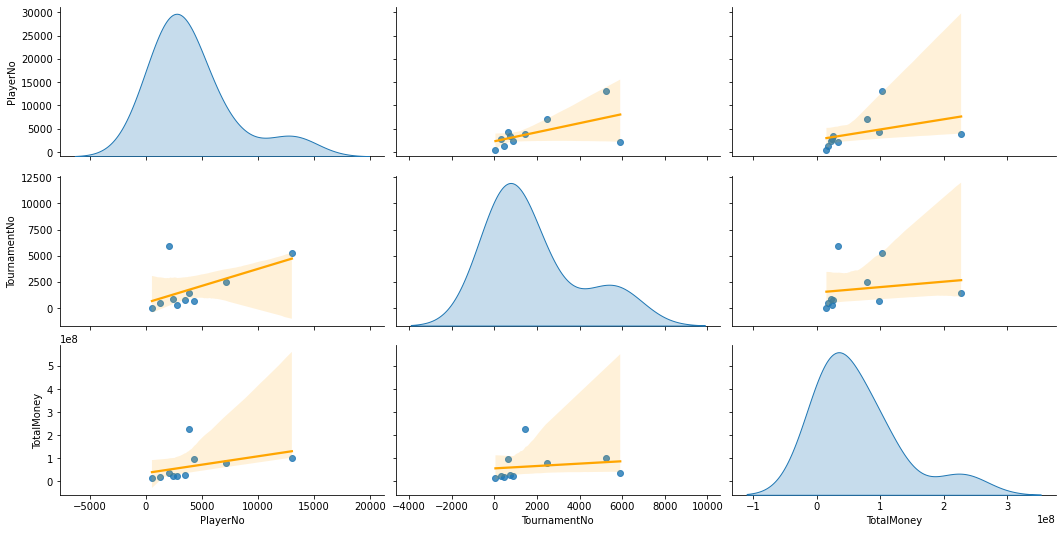

In [29]:
Top10Games.iplot(kind='bar',
                 subplots=True,
                 subplot_titles=True,
                 shape=(1, 3),
                 showgrid=False,
                 colorscale='pastel2',
                 title='TOP 10 GAMES IN TTL MONEY')

sns.pairplot(Top10Games, aspect=2,
             diag_kind='kde', kind="reg", plot_kws={'line_kws': {'color': 'orange'}})

# Conclusion

**SUMMARY**:
1. ESport is growing quickly both in number of player and earnings. Its earnings value is flying off in 2010s
2. There is a possibility that the ESport is focusing on big and quality tournament with higher prize in comparing to last decades.
3. The Esport Earnings of a game is not affected by the number of player or tournament of that game. Such as, the most earning game is Dota 2 while its number of tournament and players are only at rank 5th.
4. The most genres have highest earning are 'Multi Online Battle Arena' with Dota 2 at 1st place and 'First Person Shooter' with Counter-Strike:Go at 2nd place